In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import sqlalchemy
import seaborn as sns
import sklearn
#eng=sqlalchemy.create_engine("mysql+pymysql://AQMUser:*@35.199.179.224:3306/Translink")
#dframe=pd.read_sql_table( 'IncomingTweetsSentiment',eng)
#dframe.to_csv('tweet_data.csv',index=False)

In [7]:
df=pd.read_csv('tweet_data.csv')

In [8]:
# Import Data
#corpus_df = pd.read_csv('tweet_data.csv')
#corpus = corpus_df['Document'].values.astype('U')
#corpus

In [9]:
df.head()

,TweetID,ScreenName,TweetText,TweetDateTime,Followers,SentimentPolarity
0,1043979473656328192,ScienceOfSmut,Ok there’s a problem train at Broadway Station...,2018-09-23 21:44:37,1171,0.091343
1,1043981305329774592,ScienceOfSmut,HALLELU! Our #skytrain is moving again. @trans...,2018-09-23 21:51:54,1171,0.314101
2,1043981487815553024,itsrho,@TransLink well youre@403 Bridgeport never sho...,2018-09-23 21:52:37,6,0.250553
3,1043981809833267200,ScienceOfSmut,Aaaaand we’ve stopped... #spoketoosoon #stopth...,2018-09-23 21:53:54,1171,0.119664
4,1043981814409261056,huynh_patrick1,@TransLink I keep hearing a skytrain announcem...,2018-09-23 21:53:55,3,0.198395


In [10]:
#language identification
from langdetect import detect
from langdetect import detect_langs
#package to clean text
import re

In [11]:
#Choose the tweet column
x=df['TweetText']
print(x.shape)
#See if there are retweets
print(x.unique().shape)

(23581,)
(22436,)


In [12]:
23581-22436

1145

In [13]:
#See the top retweets
df.groupby(['TweetText']).size().reset_index(name='counts')\
.sort_values('counts', ascending=False).head(10)
#Idea see if the top retweets are + or - in sentiment.

,TweetText,counts
8779,@TransLink Thanks!,59
8512,@TransLink Thank you!,49
2705,@TransLink,35
8424,@TransLink Thank you,35
8601,@TransLink Thanks,30
20651,RT @WestVanRec: 55 Plus? Get there by bus! Tak...,29
20490,RT @CyndiGerlach: What do you do when a @Trans...,27
20538,RT @JanetBrown980: BREAKING: ⁦@JustinTrudeau⁩...,26
20646,RT @WayneMantykaCTV: “Marky” went through Regi...,23
20537,RT @JanetBrown980: BREAKING: ⁦@TransLink⁩ sa...,21


In [14]:
#Make a new column to highlight retweets
#RT means retweet
#This looks for RT, using lambda function here,
df['is_retweet'] = df['TweetText'].apply(lambda x: x[:2]=='RT')
# Number of retweets
df['is_retweet'].sum() 

1128

In [15]:
 # number of unique retweets
df.loc[df['is_retweet']].TweetText.unique().size

444

In [16]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

In [17]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.TweetText.apply(find_retweeted)
df['mentioned'] = df.TweetText.apply(find_mentioned)
df['hashtags'] = df.TweetText.apply(find_hashtags)

In [18]:
df

,TweetID,ScreenName,TweetText,TweetDateTime,Followers,SentimentPolarity,is_retweet,retweeted,mentioned,hashtags
0,1043979473656328192,ScienceOfSmut,Ok there’s a problem train at Broadway Station...,2018-09-23 21:44:37,1171,0.091343,False,[],[@TransLink],[]
1,1043981305329774592,ScienceOfSmut,HALLELU! Our #skytrain is moving again. @trans...,2018-09-23 21:51:54,1171,0.314101,False,[],[@translink],[#skytrain]
2,1043981487815553024,itsrho,@TransLink well youre@403 Bridgeport never sho...,2018-09-23 21:52:37,6,0.250553,False,[],[@TransLink],[]
3,1043981809833267200,ScienceOfSmut,Aaaaand we’ve stopped... #spoketoosoon #stopth...,2018-09-23 21:53:54,1171,0.119664,False,[],[@TransLink],"[#spoketoosoon, #stopthistrainiwannagetoff, #s..."
4,1043981814409261056,huynh_patrick1,@TransLink I keep hearing a skytrain announcem...,2018-09-23 21:53:55,3,0.198395,False,[],[@TransLink],[]
5,1043991592258826240,bionichockey,@TransLink where’s the 3:08p 340 bus at 22nd s...,2018-09-23 22:32:46,26,0.146907,False,[],[@TransLink],[]
6,1034628377443950594,Wolowic,@GabrielBauman @TransLink Done! thanks @TransL...,2018-08-29 02:26:42,563,0.838059,False,[],"[@GabrielBauman, @TransLink, @TransLink]",[]
7,1034628627722194944,GabrielBauman,@Wolowic @TransLink Ouch! Now I feel ashamed.,2018-08-29 02:27:41,111,0.022015,False,[],"[@Wolowic, @TransLink]",[]
8,1034629571281223680,ksdbcca,@TransLink at stop 58249. The 7:26 26 did not ...,2018-08-29 02:31:26,2,0.111669,False,[],[@TransLink],[]
9,1034632723271438337,gye_incognito,@GabrielBauman @TransLink @Wolowic @Sethrogen ...,2018-08-29 02:43:58,412,0.194787,False,[],"[@GabrielBauman, @TransLink, @Wolowic, @Sethro...",[]


In [19]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [20]:
hashtags_list_df.head(8)

,hashtags
1,[#skytrain]
3,"[#spoketoosoon, #stopthistrainiwannagetoff, #s..."
21,"[#doghandler, #K9]"
63,[#transit]
73,[#MetroVancouver]
79,[#ServiceChanges]
80,[#MetroVancouver]
93,[#BNEcitycouncil]


In [21]:
# create dataframe where each use of hashtag gets its own row, list comprehension
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])
flattened_hashtags_df

,hashtag
0,#skytrain
1,#spoketoosoon
2,#stopthistrainiwannagetoff
3,#skytrainfail
4,#doghandler
5,#K9
6,#transit
7,#MetroVancouver
8,#ServiceChanges
9,#MetroVancouver


In [22]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

2027

In [23]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_hashtags.head(10)

,hashtag,counts
0,#Vancouver,355
1,#TL12Days,330
2,#transit,150
3,#WorldJuniors,146
4,#SurreyBC,134
5,#bcpoli,125
6,#skytrain,116
7,#SkyTrain,103
8,#translink,92
9,#vanpoli,90


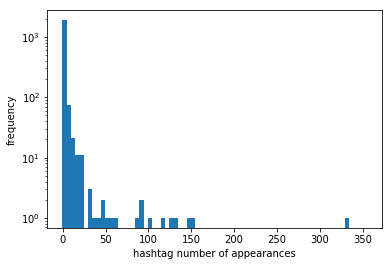

In [24]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [25]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])
popular_hashtags_set

{'#BC',
 '#BCStorm',
 '#BLine',
 '#BadAssBowinn',
 '#BritishColumbia',
 '#Burnaby',
 '#CanadaLine',
 '#CompassCard',
 '#Coquitlam',
 '#GVBOT',
 '#ILoveTransit',
 '#LRT',
 '#LestWeForget',
 '#MetroVancouver',
 '#NewWest',
 '#NewYearsEve',
 '#NorthVan',
 '#PattulloBridge',
 '#PoetryInTransit',
 '#RemembranceDay',
 '#SeaBus',
 '#Sk',
 '#SkyTrain',
 '#Skytrain',
 '#Surrey',
 '#SurreyBC',
 '#TL12Days',
 '#TransLink',
 '#Transit',
 '#Translink',
 '#UBC',
 '#Vancouver',
 '#WCE',
 '#WellnessHub',
 '#WestVan',
 '#WestVancouver',
 '#WorldJuniors',
 '#YVR',
 '#accessibility',
 '#bc',
 '#bcpoli',
 '#bus',
 '#cdnpoli',
 '#commute',
 '#compasscard',
 '#empathy',
 '#fail',
 '#inclusionmatters',
 '#northvan',
 '#publictransit',
 '#seabus',
 '#skytrain',
 '#surreybc',
 '#transit',
 '#translink',
 '#translinksucks',
 '#transportation',
 '#vancity',
 '#vancouver',
 '#vanpoli',
 '#vanre',
 '#westvan',
 '#yvr',
 '#zeroemission'}

In [26]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]


In [108]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))
hashtag_vector_df    ;

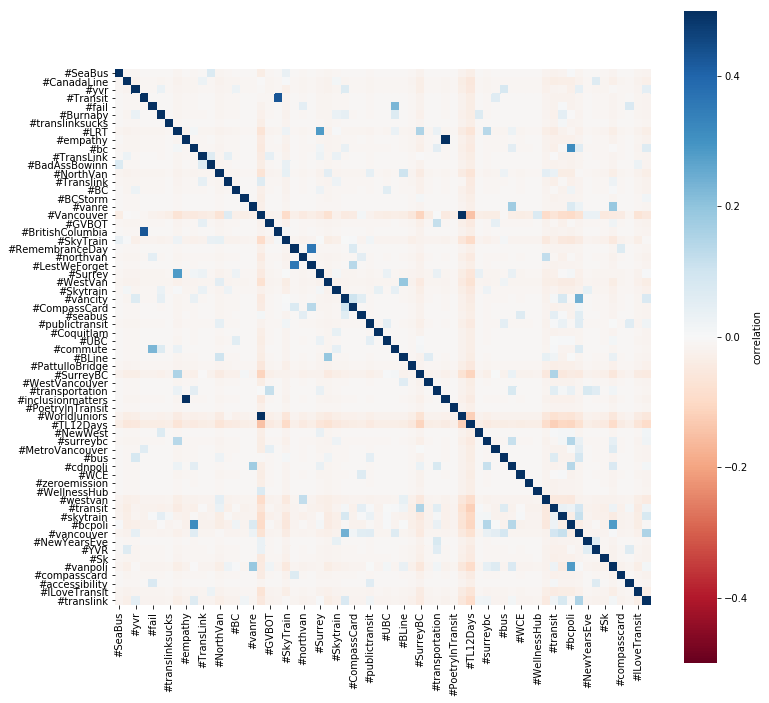

In [28]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-.5,
    vmax=.5,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [29]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/franciumpnc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [96]:
my_stopwords = nltk.corpus.stopwords.words('english')

newStopWords = ['translink','transit','vancouver','skytrain','station','bu','people','go','one','thank','time','stop','train']
my_stopwords.extend(newStopWords)




word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@ #'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [97]:
#Use the cleaning function above to make a new column of cleaned tweet
df['clean_tweet'] = df.TweetText.apply(clean_tweet)
df.to_csv('CleanedData.csv')

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()
tf_feature_names;

In [99]:
corp1=df['clean_tweet']
corp=corp1.values
corp

array(['ok there’ problem broadway current i’m stuck outsid nanaimo a… ',
       'hallelu move ', ' well your  bridgeport never show  pm  road',
       ...,
       ' find polit natur everyth say exhaust along tri keep un fact seemingli endless backtrack save face win win like oh good job hijack fail miser westvan  ',
       'enter chanc win pair ticket watch sofanc courtesi ',
       ' i’m tri find compromis work commun i’m best lead i’m sorri can’t appreci '],
      dtype=object)

In [100]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

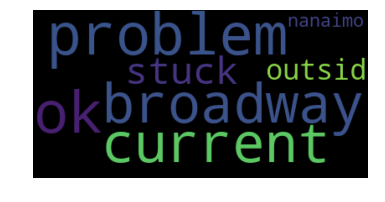

In [103]:
# Start with one line:
text =corp[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 1238612 words in the combination of all tweets.


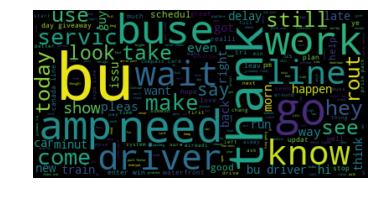

In [104]:
#Now join all the words 
text = " ".join(i for i in corp)
print ("There are {} words in the combination of all tweets.".format(len(text)))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [116]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 3

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [106]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=3, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [107]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [38]:
no_top_words = 25
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights
0,station,1296.5,make,523.5,’t,1379.2,bu,2784.7,thank,2200.4,bu,1432.7
1,skytrain,950.3,need,487.6,day,710.1,stop,1291.2,get,736.8,wait,983.1
2,line,920.0,’,479.6,win,562.2,time,653.0,one,648.1,’,899.5
3,train,875.5,new,468.6,card,558.7,driver,643.1,peopl,558.3,stop,834.5
4,canada,360.6,year,449.8,’,557.7,show,499.8,pleas,485.1,train,727.1
5,waterfront,359.7,amp,395.4,ticket,541.2,schedul,484.7,know,475.4,minut,645.9
6,open,337.2,like,376.3,enter,514.2,servic,481.3,would,421.2,i,638.9
7,go,331.5,time,354.1,compass,463.5,happen,412.4,buse,383.0,get,548.5
8,expo,290.1,get,316.0,’s,387.2,pm,402.0,like,380.5,late,540.5
9,car,283.7,would,309.9,don,367.2,rout,362.9,driver,377.9,delay,540.0


In [113]:
#NMF Solution
from sklearn.decomposition import NMF
n_components_NMF = 3
model1 = NMF(n_components=n_components_NMF)
W = model.fit_transform(tf)
H = model.components_

""" # Normalize to compare to LDA
pi_ik = W/np.sum(W,1,keepdims=True)
b_vk = (H.T/np.sum(H.T,0,keepdims=True))

"""
def display_topics(model1, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)


In [115]:
no_top_words = 40
display_topics(model1, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights
0,bu,9.1,’,4.4,day,3.0
1,driver,1.8,get,2.7,win,2.7
2,wait,1.1,’t,2.2,enter,2.6
3,minut,0.6,it,2.0,’s,2.2
4,late,0.6,line,1.8,giveaway,2.2
5,get,0.5,i,1.1,tlday,2.1
6,take,0.5,like,1.0,ticket,2.1
7,min,0.4,buse,1.0,pack,1.8
8,show,0.4,need,0.9,prize,1.7
9,rout,0.4,work,0.9,featur,1.6


In [117]:
pwd

'/Users/franciumpnc/Documents/ML/AQM/Working_directry/NLP'